**imports**

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 40000)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 3000)

import  matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import regexp_tokenize 
from string import punctuation
from nltk.stem import WordNetLemmatizer 

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import re

import string
from string import punctuation

stopwords = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**create dataframe for bernie's tweets**

In [0]:
path = '/content/drive/My Drive/datasets/trump.csv'
df_trump = pd.read_csv(path)
#drop duplicate articles on original df_trumpset
df_trump.drop_duplicates(subset="text",keep = "first", inplace = True)
print("Total retrieved articles: ",df_trump.shape[0])
print(df_trump.shape)
df_trump.head()

Total retrieved articles:  9385
(9385, 3)


,username,text,date
0,realDonaldTrump,"The @nytimes story is a Fake, just like the “p...",2020-04-13
1,realDonaldTrump,I am working hard to expose the corruption and...,2020-04-13
2,realDonaldTrump,Thank you Paris!,2020-04-13
3,realDonaldTrump,Thank you!,2020-04-13
4,realDonaldTrump,I look forward to it also!,2020-04-13


**text preproccess**

In [0]:
df_trump['text']=df_trump['text'].astype('str')

In [0]:
#make all text lowercase
df_trump['clean_text'] = df_trump['text'].str.lower()

In [0]:
#remove words < 2 chars
df_trump['clean_text'] = df_trump['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

#remove links with regex
p=re.compile('(www|http)\S+')
df_trump['clean_text'] = df_trump['clean_text'].apply(lambda x: re.sub(p,' ',x))
#remove @
df_trump['clean_text'] = df_trump['clean_text'].apply(lambda x: re.sub('@','',x))

#remove punctuation

In [0]:
#remove stopwords function
stops =  list(stopwords) + list(punctuation)

def remove_stops(text):
    text_no_stops = []
    for i in text:
        if i not in stops:
            if len(i) == 1:
                pass
            else:
                text_no_stops.append(i)
        else:
            pass
    return text_no_stops




In [0]:
#tokenize
df_trump['text_tokenized'] = df_trump['clean_text'].apply(lambda x: regexp_tokenize(x,"[\w']+"))


In [0]:
#actually remove stopwords
df_trump['text_tokenized'] = df_trump['text_tokenized'].apply(lambda x: remove_stops(x))

In [0]:
#lematization function
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    lemmatized = []
    for word in text:
        lemmatized.append(lemmatizer.lemmatize(word))
    return lemmatized

In [0]:
#lemmatize
df_trump['text_lemma'] = df_trump['text_tokenized'].apply(lemmatize_text)

In [0]:
#create a string from lemmatized words
df_trump['lemmatized_string'] = df_trump['text_lemma'].apply(lambda x: ' '.join(x))

In [0]:
#check the dataframe
df_trump.head()

,username,text,date,clean_text,text_tokenized,text_lemma,lemmatized_string
0,realDonaldTrump,"The @nytimes story is a Fake, just like the “p...",2020-04-13,"the nytimes story fake, just like the “paper” ...","[nytimes, story, fake, like, paper, criticized...","[nytimes, story, fake, like, paper, criticized...",nytimes story fake like paper criticized movin...
1,realDonaldTrump,I am working hard to expose the corruption and...,2020-04-13,working hard expose the corruption and dishone...,"[working, hard, expose, corruption, dishonesty...","[working, hard, expose, corruption, dishonesty...",working hard expose corruption dishonesty lame...
2,realDonaldTrump,Thank you Paris!,2020-04-13,thank you paris!,"[thank, paris]","[thank, paris]",thank paris
3,realDonaldTrump,Thank you!,2020-04-13,thank you!,[thank],[thank],thank
4,realDonaldTrump,I look forward to it also!,2020-04-13,look forward also!,"[look, forward, also]","[look, forward, also]",look forward also


In [0]:
# tfidf vectorizer of scikit learn

vectorizer = TfidfVectorizer(stop_words=stopwords,use_idf = True, ngram_range=(1,2))
#vectorize lemmatized tweets
X = vectorizer.fit_transform(df_trump['lemmatized_string'])
terms = vectorizer.get_feature_names()


In [0]:
df_trump.head()

,username,text,date,clean_text,text_tokenized,text_lemma,lemmatized_string
0,realDonaldTrump,"The @nytimes story is a Fake, just like the “p...",2020-04-13,"the nytimes story fake, just like the “paper” ...","[nytimes, story, fake, like, paper, criticized...","[nytimes, story, fake, like, paper, criticized...",nytimes story fake like paper criticized movin...
1,realDonaldTrump,I am working hard to expose the corruption and...,2020-04-13,working hard expose the corruption and dishone...,"[working, hard, expose, corruption, dishonesty...","[working, hard, expose, corruption, dishonesty...",working hard expose corruption dishonesty lame...
2,realDonaldTrump,Thank you Paris!,2020-04-13,thank you paris!,"[thank, paris]","[thank, paris]",thank paris
3,realDonaldTrump,Thank you!,2020-04-13,thank you!,[thank],[thank],thank
4,realDonaldTrump,I look forward to it also!,2020-04-13,look forward also!,"[look, forward, also]","[look, forward, also]",look forward also


**K-MEANS clustering**

**find best K by using elbow rule**

In [0]:
  '''distortions = []
    K = range(150,160)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(X)
        distortions.append(km.inertia_)'''

'distortions = []\n  K = range(150,160)\n  for k in K:\n      km = KMeans(n_clusters=k)\n      km.fit(X)\n      distortions.append(km.inertia_)'

In [0]:
   ''' plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()'''

" plt.figure(figsize=(16,8))\n plt.plot(K, distortions, 'bx-')\n plt.xlabel('k')\n plt.ylabel('Distortion')\n plt.title('The Elbow Method showing the optimal k')\n plt.show()"

In [0]:
df_trump.head()

,username,text,date,clean_text,text_tokenized,text_lemma,lemmatized_string
0,realDonaldTrump,"The @nytimes story is a Fake, just like the “p...",2020-04-13,"the nytimes story fake, just like the “paper” ...","[nytimes, story, fake, like, paper, criticized...","[nytimes, story, fake, like, paper, criticized...",nytimes story fake like paper criticized movin...
1,realDonaldTrump,I am working hard to expose the corruption and...,2020-04-13,working hard expose the corruption and dishone...,"[working, hard, expose, corruption, dishonesty...","[working, hard, expose, corruption, dishonesty...",working hard expose corruption dishonesty lame...
2,realDonaldTrump,Thank you Paris!,2020-04-13,thank you paris!,"[thank, paris]","[thank, paris]",thank paris
3,realDonaldTrump,Thank you!,2020-04-13,thank you!,[thank],[thank],thank
4,realDonaldTrump,I look forward to it also!,2020-04-13,look forward also!,"[look, forward, also]","[look, forward, also]",look forward also


In [0]:
#K-means clustering
num_clusters = 40
km = KMeans(n_clusters=num_clusters,init='k-means++')
labels = km.fit_predict(X)


In [0]:
print("K-means clustering: \n")
asc_order_centroids = km.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])
    print('\n')


K-means clustering: 

Cluster 0:
 great
 american
 country
 people
 never
 good
 president
 happy
 day
 time


Cluster 1:
 book
 great book
 new book
 great
 new
 great new
 number one
 number
 one
 book great


Cluster 2:
 love
 thank
 love country
 great
 country
 ohio
 texas love
 thank love
 texas
 people


Cluster 3:
 democrat
 nothing
 nothing democrat
 impeachment
 left
 radical
 radical left
 want
 party
 hoax


Cluster 4:
 endorsement
 vet
 total endorsement
 military
 strong
 total
 complete
 crime
 military vet
 border


Cluster 5:
 hillary
 crooked
 crooked hillary
 clinton
 hillary clinton
 fbi
 dnc
 email
 dossier
 comey


Cluster 6:
 would
 reserve
 federal reserve
 rate
 federal
 fed
 interest
 interest rate
 much
 inflation


Cluster 7:
 texas
 florida
 know
 government
 great
 people
 dallas
 pensacola
 federal government
 federal


Cluster 8:
 high
 record high
 record
 stock
 stock market
 market
 time high
 hit
 time
 market hit


Cluster 9:
 people
 puerto
 rico
 

In [0]:
#add cluster label to dataframe
df_trump['cluster'] = labels


In [0]:
df_trump.head()

,username,text,date,clean_text,text_tokenized,text_lemma,lemmatized_string,cluster
0,realDonaldTrump,"The @nytimes story is a Fake, just like the “p...",2020-04-13,"the nytimes story fake, just like the “paper” ...","[nytimes, story, fake, like, paper, criticized...","[nytimes, story, fake, like, paper, criticized...",nytimes story fake like paper criticized movin...,20
1,realDonaldTrump,I am working hard to expose the corruption and...,2020-04-13,working hard expose the corruption and dishone...,"[working, hard, expose, corruption, dishonesty...","[working, hard, expose, corruption, dishonesty...",working hard expose corruption dishonesty lame...,30
2,realDonaldTrump,Thank you Paris!,2020-04-13,thank you paris!,"[thank, paris]","[thank, paris]",thank paris,14
3,realDonaldTrump,Thank you!,2020-04-13,thank you!,[thank],[thank],thank,14
4,realDonaldTrump,I look forward to it also!,2020-04-13,look forward also!,"[look, forward, also]","[look, forward, also]",look forward also,37


**plot cluster size**

In [0]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,9)})
plt.style.use('fivethirtyeight')

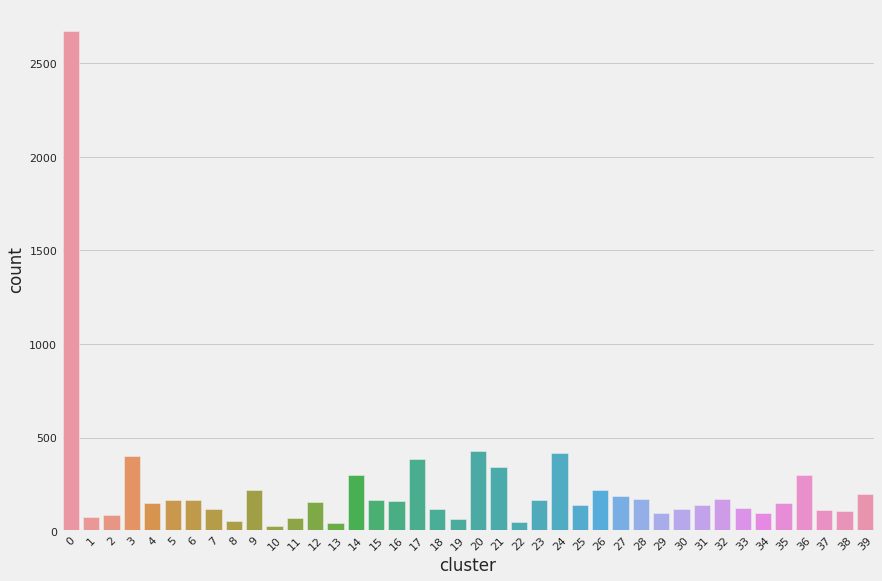

In [0]:
ax = sns.countplot(x= 'cluster', data=df_trump)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

**plot the clusters**

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

**sentiment analysis**

In [0]:
from textblob import TextBlob

In [0]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    #return  analysis.sentiment.polarity
    
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity == 0:
        return "neutral"
    else:
        return "negative"

In [0]:
df_trump['sentiment'] = np.array([ analyze_sentiment(tweet) for tweet in df_trump['lemmatized_string'] ])

In [0]:
df_trump.head()

,username,text,date,clean_text,text_tokenized,text_lemma,lemmatized_string,cluster,sentiment,year
0,realDonaldTrump,"The @nytimes story is a Fake, just like the “p...",2020-04-13,"the nytimes story fake, just like the “paper” ...","[nytimes, story, fake, like, paper, criticized...","[nytimes, story, fake, like, paper, criticized...",nytimes story fake like paper criticized movin...,20,negative,2020
1,realDonaldTrump,I am working hard to expose the corruption and...,2020-04-13,working hard expose the corruption and dishone...,"[working, hard, expose, corruption, dishonesty...","[working, hard, expose, corruption, dishonesty...",working hard expose corruption dishonesty lame...,30,negative,2020
2,realDonaldTrump,Thank you Paris!,2020-04-13,thank you paris!,"[thank, paris]","[thank, paris]",thank paris,14,neutral,2020
3,realDonaldTrump,Thank you!,2020-04-13,thank you!,[thank],[thank],thank,14,neutral,2020
4,realDonaldTrump,I look forward to it also!,2020-04-13,look forward also!,"[look, forward, also]","[look, forward, also]",look forward also,37,neutral,2020


**persentage of positive/negative/neutral tweets**

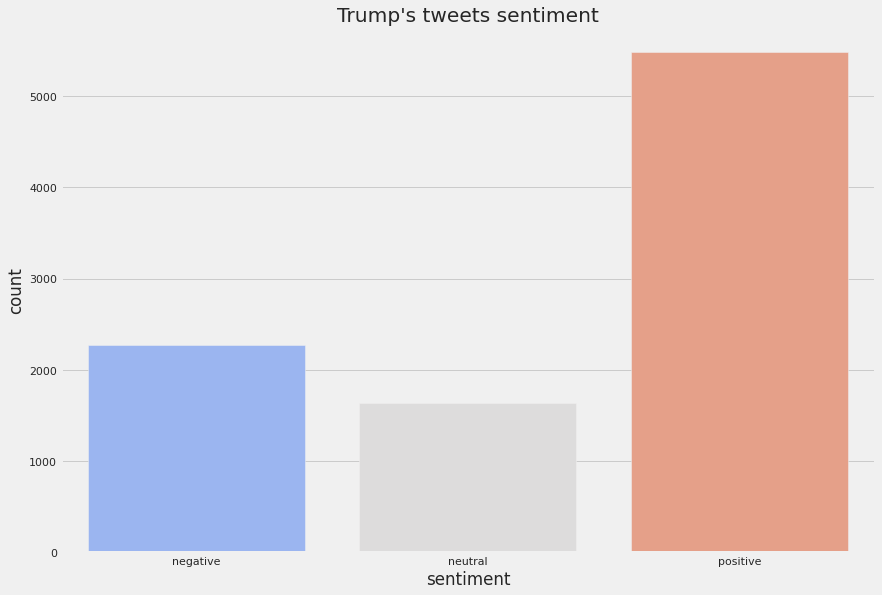

In [0]:
ax = sns.countplot(x= 'sentiment', data=df_trump,palette='coolwarm').set_title("Trump's tweets sentiment")
plt.show()

**find popular hashtags**

In [0]:
#create new df hashtags
hashtags = df_trump["text"].str.extractall(r'(\#\w+)')[0].value_counts().reset_index()

In [0]:
hashtags.columns=['tag','count']

Text(0.5, 1.0, '25 more popular hashtags used by Donald Trump')

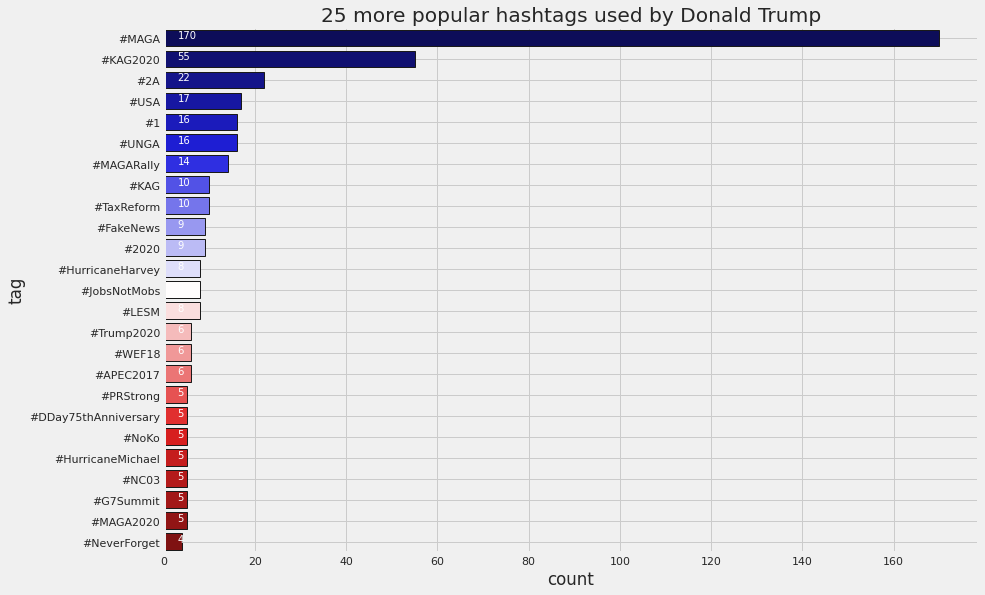

In [0]:
ax = sns.barplot(x = "count" , y = "tag" ,
                 data = hashtags[:25] , palette = "seismic",
                 linewidth = 1 , edgecolor = "k")
plt.grid(True)
for i,j in enumerate(hashtags["count"][:25].values) :
    ax.text(3,i,j,fontsize = 10,color = "white")
plt.title("25 more popular hashtags used by Donald Trump")

**popular account handlers used**

In [0]:
#create new df accounts
accounts = df_trump["text"].str.extractall(r'(\@\w+)')[0].value_counts().reset_index()

In [0]:
accounts.columns=['username','count']

Text(0.5, 1.0, '25 more popular usernames mentioned by Bernie Sanders')

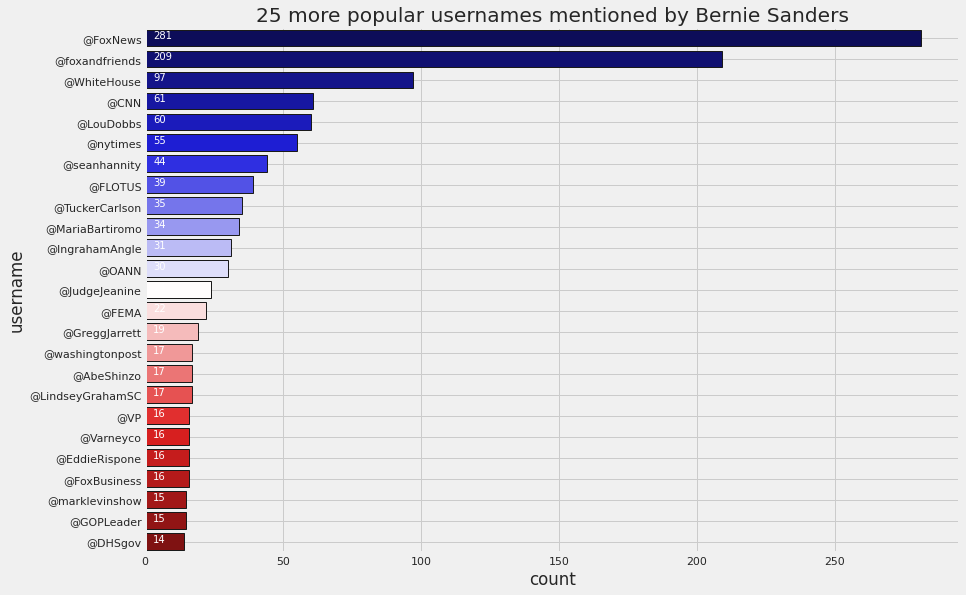

In [0]:
ax = sns.barplot(x = "count" , y = "username" ,
                 data = accounts[:25] , palette = "seismic",
                 linewidth = 1 , edgecolor = "k")
plt.grid(True)
for i,j in enumerate(accounts["count"][:25].values) :
    ax.text(3,i,j,fontsize = 10,color = "white")
plt.title("25 more popular usernames mentioned by Donald Trump")

**network analysis**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx

In [0]:
def network_tweets(df,frequency,color,title) :
    #documents
    documents  = df["lemmatized_string"].tolist()
    vectorizer = CountVectorizer()
    vec        = vectorizer.fit_transform(documents)
    vec_t      = vectorizer.fit_transform(documents).transpose()
    
    #adjecency matrix for words
    adj_mat    = pd.DataFrame((vec_t * vec).toarray(),
                              columns = vectorizer.get_feature_names(),
                              index    = vectorizer.get_feature_names()
                             )
    # #stacking combinations
    adj_mat_stack   = adj_mat.stack().reset_index()
    adj_mat_stack.columns = ["link_1","link_2","count"]
    
    #drop same word combinations
    adj_mat_stack   = adj_mat_stack[adj_mat_stack["link_1"] !=
                                    adj_mat_stack["link_2"]] 
    
    #subset dataframe with combination count greater than x times
    network_sub = adj_mat_stack[adj_mat_stack["count"] > frequency]
    
    #plot network
    H = nx.from_pandas_edgelist(network_sub,"link_1","link_2",["count"],
                                create_using = nx.DiGraph())

    ax = plt.figure(figsize = (18,18))
    nx.draw(H,with_labels = True,alpha = .7,node_shape = "H",
            width = 1,node_color = color,
            font_weight = "bold",style = "solid", arrowsize = 15 ,
            font_color = "white",linewidths = 10,edge_color = "grey",
            node_size = 1300,pos = nx.kamada_kawai_layout(H))
    plt.title(title,color = "white")
    ax.set_facecolor("k")

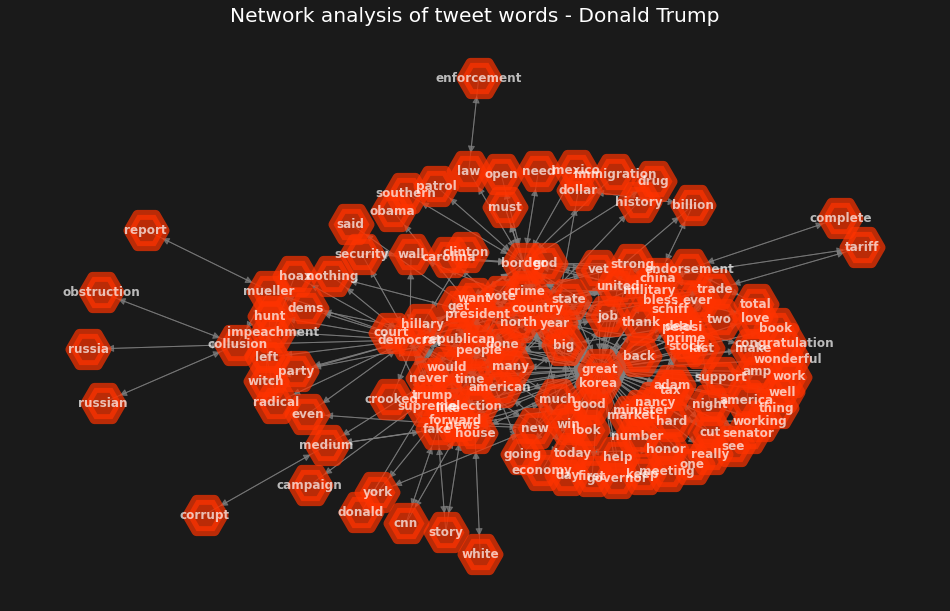

In [0]:
network_tweets(df_trump,80,"#FF3300","Network analysis of tweet words - Donald Trump")

**tweets per year plot**

In [0]:
#create column year
df_trump['year'] = df_trump['date'].apply(lambda buf: int(buf[:4]))

Text(0.5, 1.0, "Trump's tweets per year")

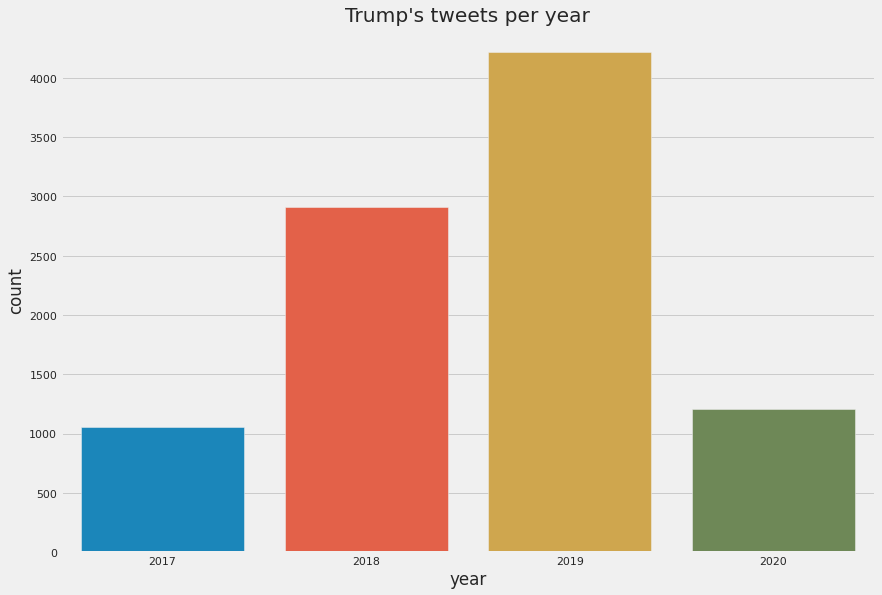

In [0]:
sns.countplot(x='year',data=df_trump,).set_title("Trump's tweets per year")

**WordCloud Generation**

In [0]:
dummy = df_trump[df_trump['cluster']==11]

In [0]:
text = df_trump.lemmatized_string

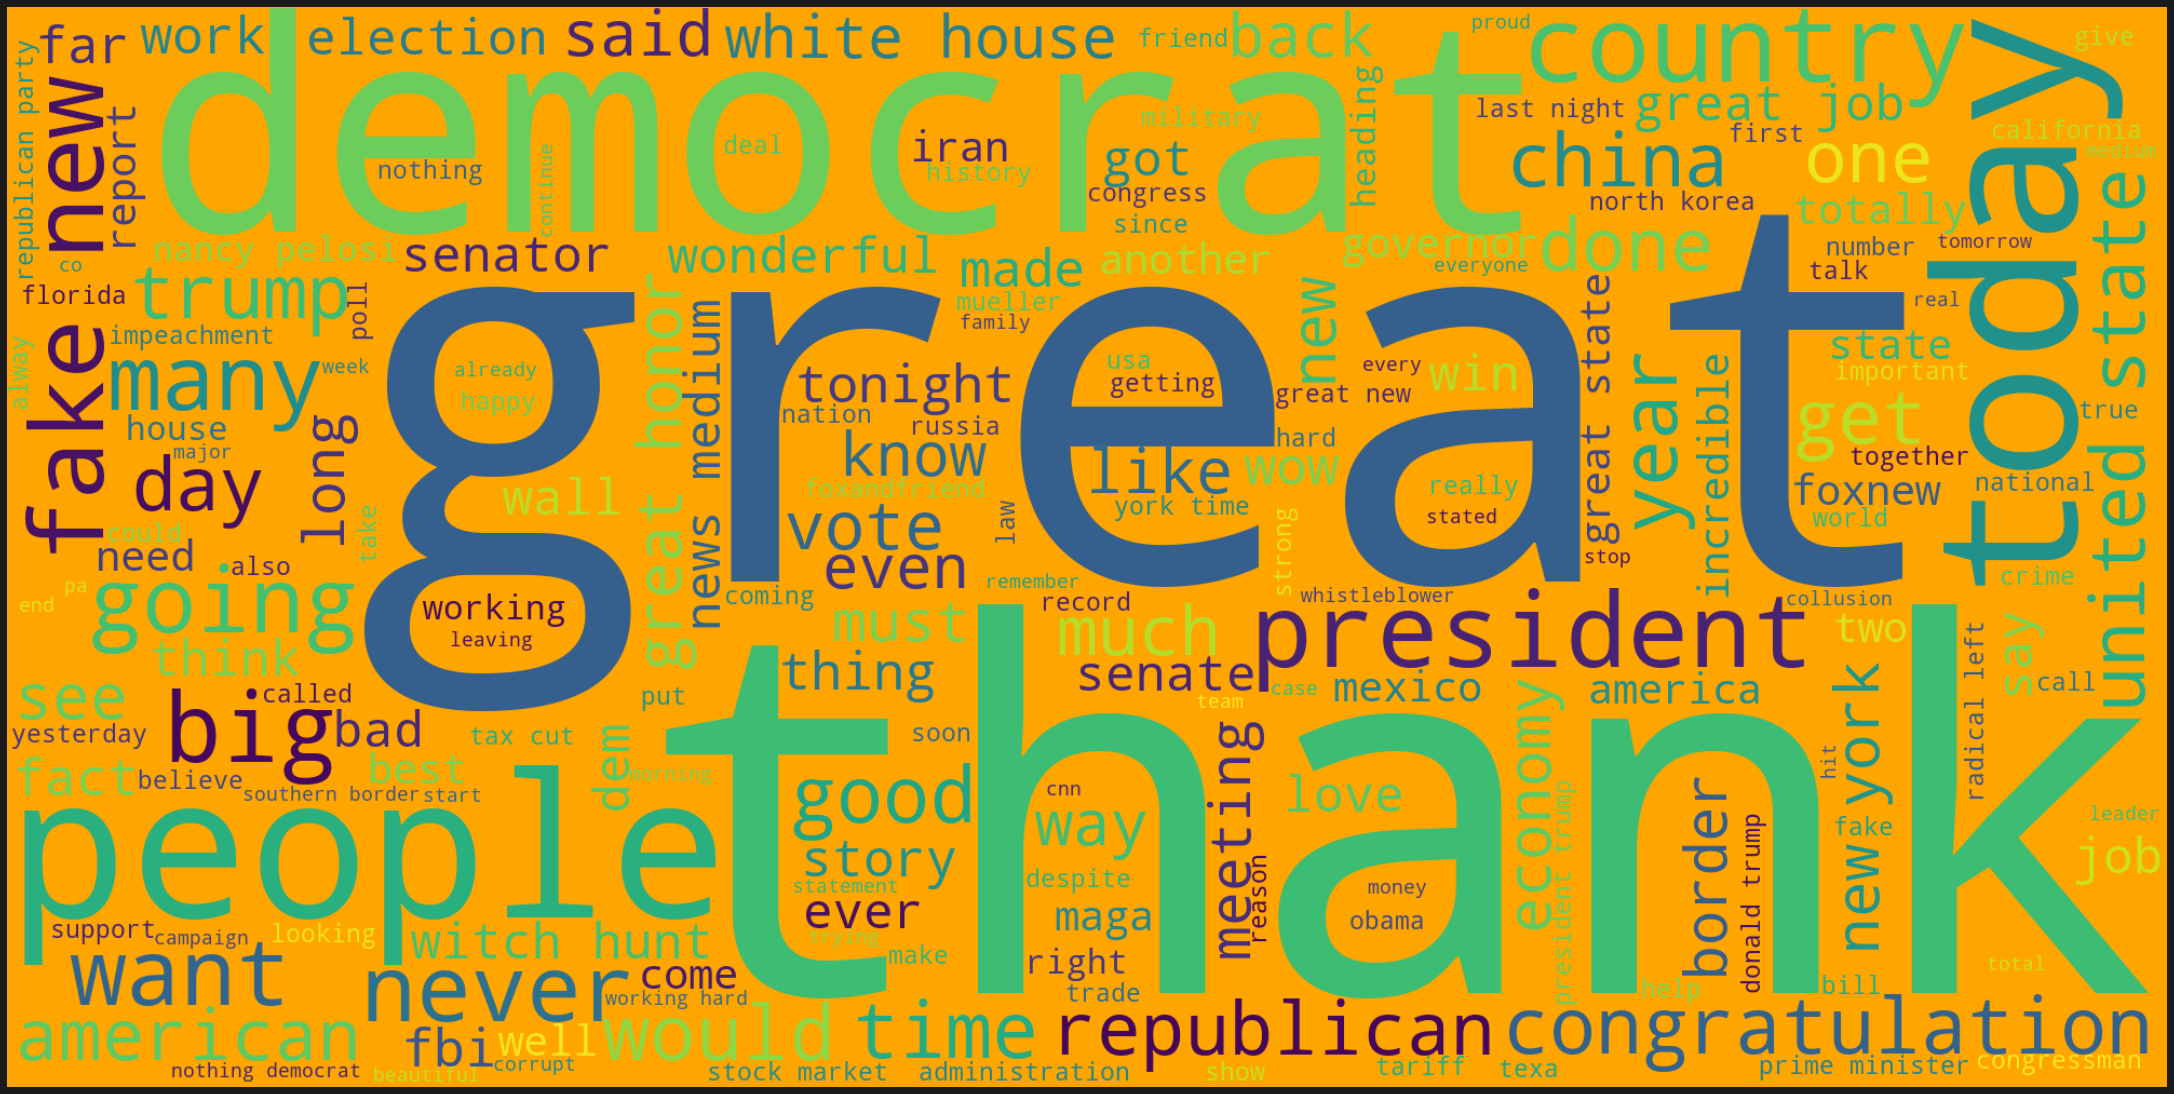

In [0]:
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'orange',
    stopwords = stopwords).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**tweets about bernie**

In [0]:
keywords = ['bernie','sanders']
bernie = pd.DataFrame()

In [0]:
for k in keywords :
  tmp = df_trump[df_trump['text'].str.lower().str.contains(k)]
  bernie = bernie.append(tmp)

bernie = bernie.reset_index(drop=True)

In [0]:
bernie.drop("cluster", axis=1, inplace=True)

In [0]:
bernie.shape

(108, 9)

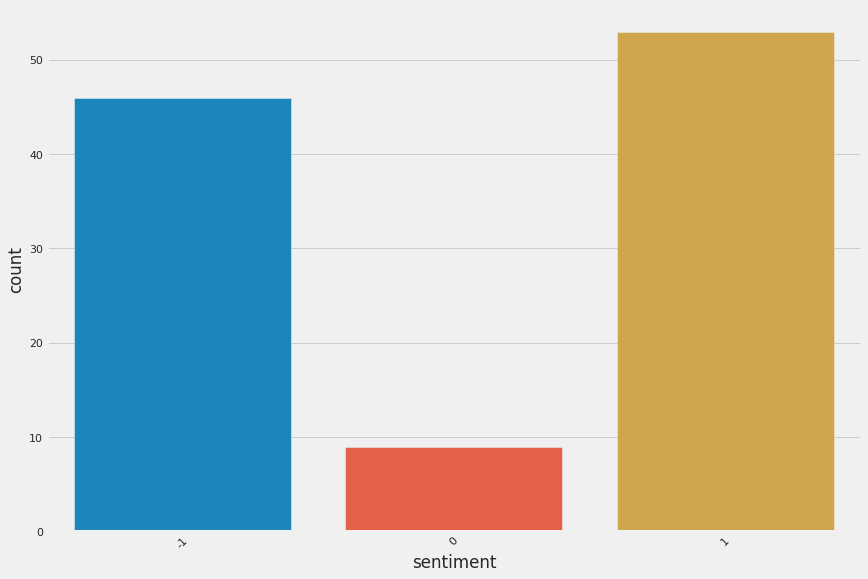

In [0]:
ax = sns.countplot(x= 'sentiment', data=bernie)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

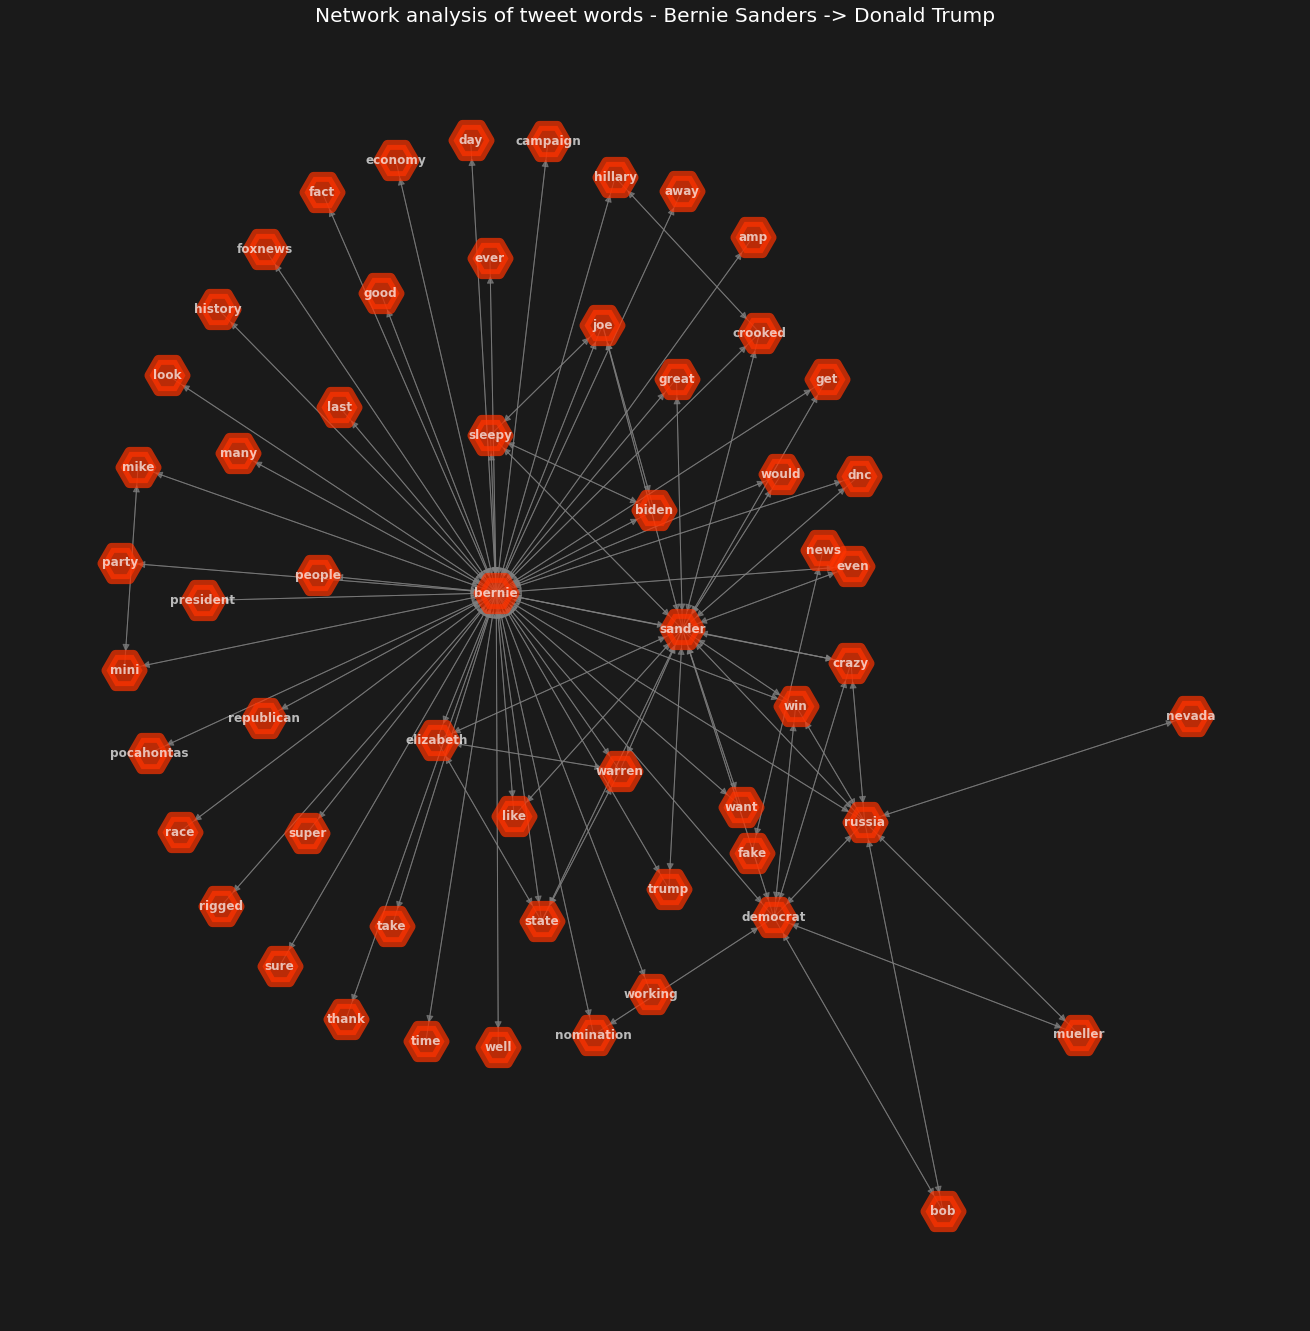

In [0]:
network_tweets(bernie,10,"#FF3300","Network analysis of tweet words - Trump -> Sanders")

In [0]:
vectorizer = TfidfVectorizer(stop_words=stopwords,max_features=10000, max_df = 0.5, use_idf = True, ngram_range=(1,2))
Y = vectorizer.fit_transform(bernie['lemmatized_string'])

num_clusters = 3
km = KMeans(n_clusters=num_clusters,init='k-means++')
labels = km.fit_predict(Y)
bernie['cluster'] = labels


In [0]:
print("K-means clustering: \n")
asc_order_centroids = km.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])
    print('\n')


K-means clustering: 

Cluster 0:
 crazy bernie
 crazy
 joe
 look
 sleepy joe
 sleepy
 going
 look like
 great
 like


Cluster 1:
 elizabeth
 warren
 elizabeth warren
 race
 even
 state
 would
 news
 fake
 pocahontas


Cluster 2:
 russia
 crooked
 democrat
 russia russia
 crooked hillary
 hillary
 right
 nomination
 rigged
 dnc




In [0]:
import umap
clusters = km.labels_.tolist()
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(X)

ValueError: ignored

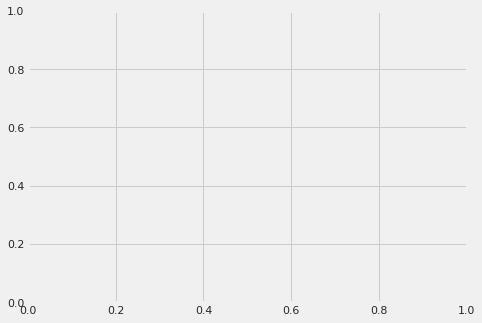

In [0]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = clusters,
s = 10, # size
edgecolor='none')
plt.show()